<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('real_estate_data.csv', sep='\t')
display(data.head(5))
display(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

### Вывод

В накоторых колонках есть много пропущенных значений, которые можно заполнить. Допустим, `is_apartment` хранит лишь значение `False`, значет места пропусков означают `True`, в численных значениях также есть пропуски, которые могут повлиять на дальнейшие вычисления. Для понимания проведем анализ значений параметров.

In [3]:
print('ceiling_height median value: ', data['ceiling_height'].median(), '\nceiling_height mean value: ', data['ceiling_height'].mean(), '\n')
print('living_area median value: ', data['living_area'].median(), '\nliving_area mean value: ', data['living_area'].mean(), '\n')
print('airports_nearest median value: ', data['airports_nearest'].median(), '\nairports_nearest mean value: ', data['airports_nearest'].mean(), '\n')
print('days_exposition median value: ', data['days_exposition'].median(), '\ndays_exposition mean value: ', data['days_exposition'].mean(), '\n')
print('parks_nearest median value: ', data['parks_nearest'].median(), '\nparks_nearest mean value: ', data['parks_nearest'].mean(), '\n')
print(data['airports_nearest'].max(), '\t', data['airports_nearest'].min())
display(data[~data['is_apartment'].isna()]['is_apartment'].head(8))
display(data[~data['balcony'].isna()]['balcony'].head(8))

data['ceiling_height'] = data['ceiling_height'].fillna(round(data['ceiling_height'].mean(), 2))
data['living_area'] = data['living_area'].fillna(round(data['living_area'].mean(), 2))
data['kitchen_area'] = data['kitchen_area'].fillna(round(data['kitchen_area'].mean(), 2))
data['days_exposition'] = data['days_exposition'].fillna(round(data['days_exposition'].median(), 2))
data['floor'] = data['floor'].fillna(round(data['floor'].median(), 2))
data['floors_total'] = data['floors_total'].fillna(round(data['floors_total'].median(), 2))

data['is_apartment'] = data['is_apartment'].fillna(True)
data['balcony'] = data['balcony'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

ceiling_height median value:  2.65 
ceiling_height mean value:  2.77149889685604 

living_area median value:  30.0 
living_area mean value:  34.457852427601395 

airports_nearest median value:  26726.0 
airports_nearest mean value:  28793.67219254282 

days_exposition median value:  95.0 
days_exposition mean value:  180.88863436982163 

parks_nearest median value:  455.0 
parks_nearest mean value:  490.80455501918556 

84869.0 	 0.0


11    False
25    False
29    False
36    False
41    False
42    False
50    False
56    False
Name: is_apartment, dtype: object

1     2.0
2     0.0
3     0.0
6     1.0
7     2.0
9     2.0
11    1.0
12    0.0
Name: balcony, dtype: float64

C:\Users\OneVay\AppData\Local\Temp\ipykernel_5736\2577767877.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(True)


Пропущеные значения в `balcony`, вероятно, означают отсутствие балкона, заполним нулями. В параметрах, где среднее значение не сильно отличается от медианного, можем взять среднее арифметическое (так как это не скажется в дальнейших расчетах). В случаях, где расхождение сильное (`days_exposition`, `parks_nearest`), вероятно, сильная разница медианных, минимальных и максимальных значений, значит берем медианное. В части колонок оставим na.

## Предобработка данных

## Расчёты и добавление результатов в таблицу

Добавим колонки, чтобы в дальнейшем было удобнее проводить анализ. Выделим даны, крайние этажи и отношения площадей.

In [4]:
#функция статуса этажа
def floor_description(row):
    if row[6] - row[8] == 0:
        return 'последний'
    elif row[8] == 1:
        return 'первый'
    else:
        return 'другой'

#преобразуем в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#создаем необходимые столбцы
data['sq_price'] = round(data['last_price'] / data['total_area'], 2)
data['day_of_week'] = data['first_day_exposition'].dt.day_name()
data['month'] = data['first_day_exposition'].dt.month_name()
data['year'] = data['first_day_exposition'].dt.year
data['floor_stat'] = data.apply(floor_description, axis=1)
data['area_ratio'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_ratio'] = round(data['kitchen_area'] / data['total_area'], 2)
display(data.head(10))

C:\Users\OneVay\AppData\Local\Temp\ipykernel_5736\1688463587.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[6] - row[8] == 0:
C:\Users\OneVay\AppData\Local\Temp\ipykernel_5736\1688463587.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif row[8] == 1:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_price,day_of_week,month,year,floor_stat,area_ratio,kitchen_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,2.0,755.0,95.0,120370.37,Thursday,March,2019,другой,0.47,0.23
1,7,3350000.0,40.40,2018-12-04,1,2.77,11.0,18.60,1,True,...,0.0,NaN,81.0,82920.79,Tuesday,December,2018,первый,0.46,0.27
2,10,5196000.0,56.00,2015-08-20,2,2.77,5.0,34.30,4,True,...,2.0,574.0,558.0,92785.71,Thursday,August,2015,другой,0.61,0.15
3,0,64900000.0,159.00,2015-07-24,3,2.77,14.0,34.46,9,True,...,3.0,234.0,424.0,408176.10,Friday,July,2015,другой,0.22,0.07
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,1.0,48.0,121.0,100000.00,Tuesday,June,2018,другой,0.32,0.41
5,10,2890000.0,30.40,2018-09-10,1,2.77,12.0,14.40,5,True,...,0.0,NaN,55.0,95065.79,Monday,September,2018,другой,0.47,0.30
6,6,3700000.0,37.30,2017-11-02,1,2.77,26.0,10.60,6,True,...,0.0,NaN,155.0,99195.71,Thursday,November,2017,другой,0.28,0.39
7,5,7915000.0,71.60,2019-04-18,2,2.77,24.0,34.46,22,True,...,0.0,NaN,95.0,110544.69,Thursday,April,2019,другой,0.48,0.26
8,20,2900000.0,33.16,2018-05-23,1,2.77,27.0,15.43,26,True,...,0.0,NaN,189.0,87454.76,Wednesday,May,2018,другой,0.47,0.27
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,0.0,NaN,289.0,88524.59,Sunday,February,2017,другой,0.71,0.11


## Исследовательский анализ данных

Рассмотрим некоторые параметры по всем данным и построим графики

In [5]:
data['last_price'].describe()


count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [6]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [7]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [8]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.770917
std          0.986524
min          1.000000
25%          2.600000
50%          2.770000
75%          2.770000
max        100.000000
Name: ceiling_height, dtype: float64

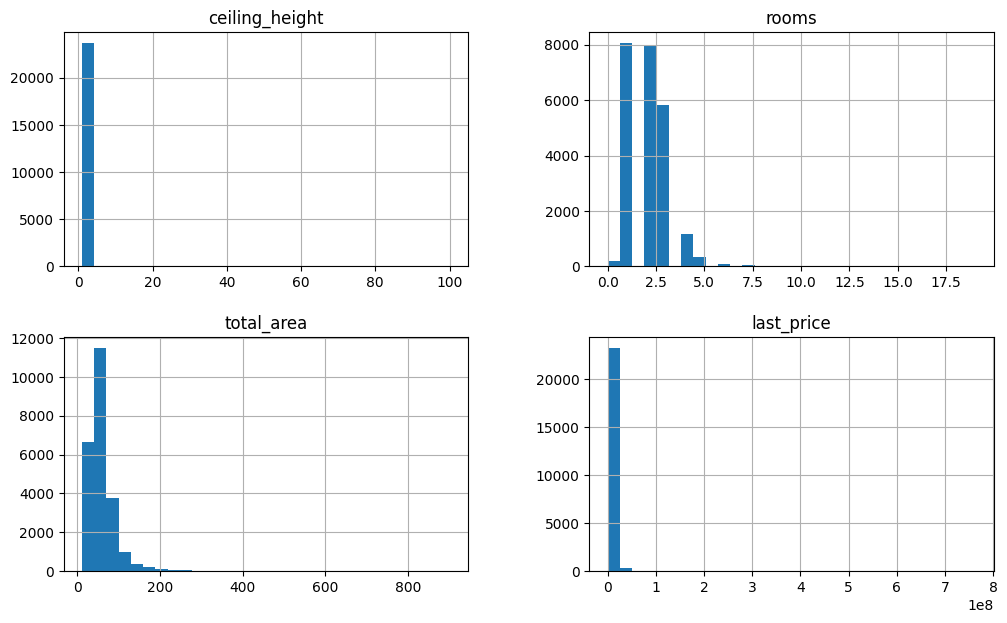

In [9]:
data[['ceiling_height', 'rooms', 'total_area', 'last_price']].hist(bins=30, figsize=(12, 7))
plt.show()

Из-за аномальных значений, значения графиков не выглядят информативно. Найдем границы, которых будет достаточно, чтобы провести более корректный анализ

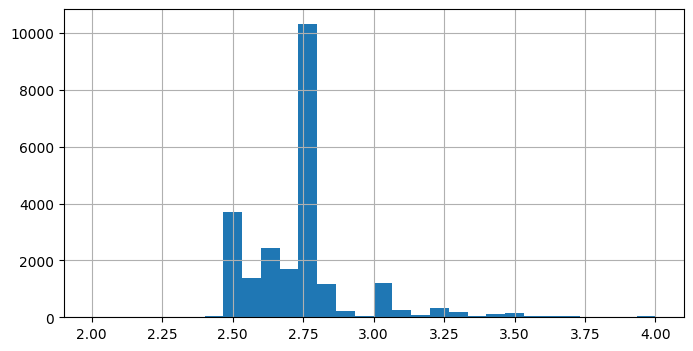

In [10]:
data['ceiling_height'].hist(bins=30, figsize=(8, 4), range=(2, 4))
plt.show()

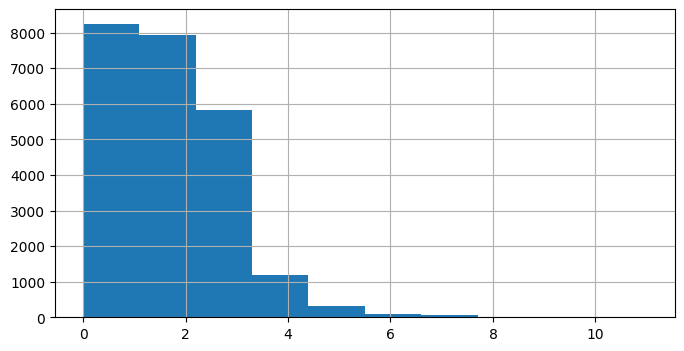

In [11]:
data['rooms'].hist(bins=10, figsize=(8, 4), range=(0, 11))
plt.show()

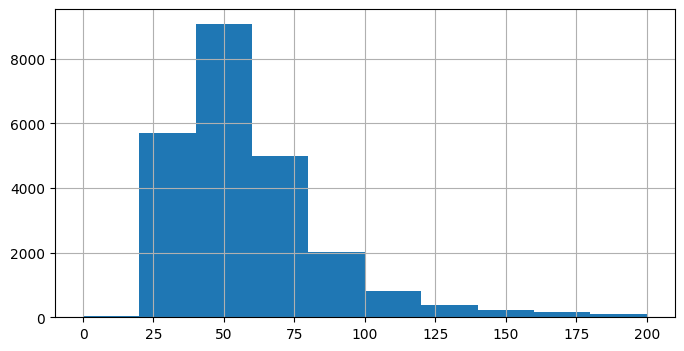

In [12]:
data['total_area'].hist(bins=10, figsize=(8, 4), range=(0, 200))
plt.show()

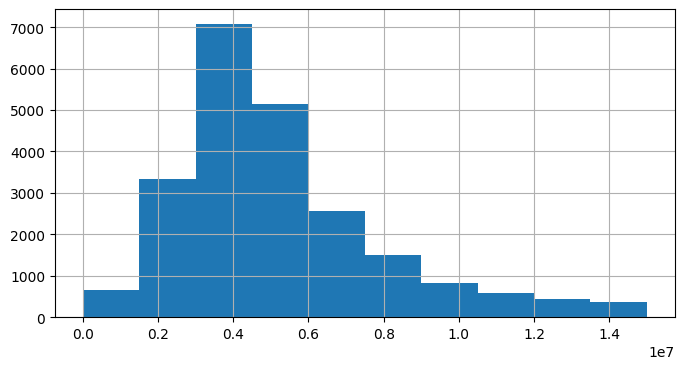

In [13]:
data['last_price'].hist(bins=10, figsize=(8, 4), range=(0, 15000000))
plt.show()

Далее отдельно рассмотрим продажи по месяцам и срок публикации объявления

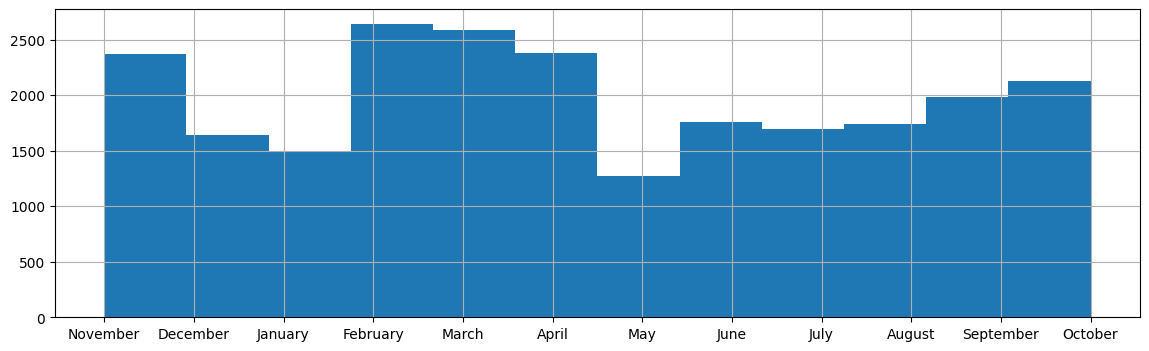

In [14]:
data.sort_values(by='first_day_exposition')['month'].hist(bins=12, figsize=(14, 4))
plt.show()

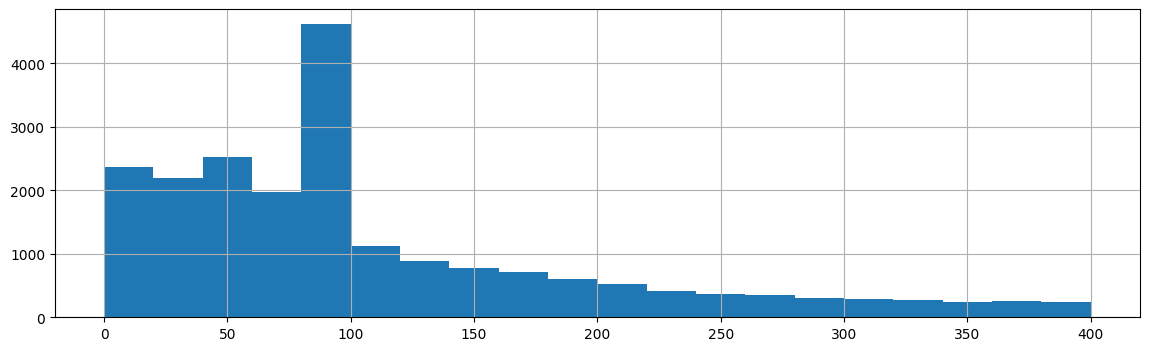

In [15]:
data.sort_values(by='days_exposition')['days_exposition'].hist(bins=20, figsize=(14, 4), range=(0, 400))
plt.show()

In [16]:
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Аномальные значения необходимо удалить: они отрицательно влияют на корректность результатов, сохраним данные в отдельную таблицу, чтобы в дальнейшем сравнить со старыми показателями

In [17]:
data_filter = data.query("2 <= ceiling_height <= 4 and 0 <= rooms <= 7 and 0 <= total_area <= 200 and 0 <= last_price <= 20000000 and 0 <= days_exposition <= 500")
display(data_filter.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_price,day_of_week,month,year,floor_stat,area_ratio,kitchen_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,2.0,755.0,95.0,120370.37,Thursday,March,2019,другой,0.47,0.23
1,7,3350000.0,40.40,2018-12-04,1,2.77,11.0,18.60,1,True,...,0.0,NaN,81.0,82920.79,Tuesday,December,2018,первый,0.46,0.27
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,1.0,48.0,121.0,100000.00,Tuesday,June,2018,другой,0.32,0.41
5,10,2890000.0,30.40,2018-09-10,1,2.77,12.0,14.40,5,True,...,0.0,NaN,55.0,95065.79,Monday,September,2018,другой,0.47,0.30
6,6,3700000.0,37.30,2017-11-02,1,2.77,26.0,10.60,6,True,...,0.0,NaN,155.0,99195.71,Thursday,November,2017,другой,0.28,0.39
7,5,7915000.0,71.60,2019-04-18,2,2.77,24.0,34.46,22,True,...,0.0,NaN,95.0,110544.69,Thursday,April,2019,другой,0.48,0.26
8,20,2900000.0,33.16,2018-05-23,1,2.77,27.0,15.43,26,True,...,0.0,NaN,189.0,87454.76,Wednesday,May,2018,другой,0.47,0.27
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,0.0,NaN,289.0,88524.59,Sunday,February,2017,другой,0.71,0.11
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,True,...,2.0,553.0,137.0,127525.25,Thursday,November,2017,другой,0.51,0.21
11,9,3300000.0,44.00,2018-08-27,2,2.77,5.0,31.00,4,False,...,0.0,NaN,7.0,75000.00,Monday,August,2018,другой,0.70,0.14


Рассмотрим параметры, которые влияют на цену квартиры

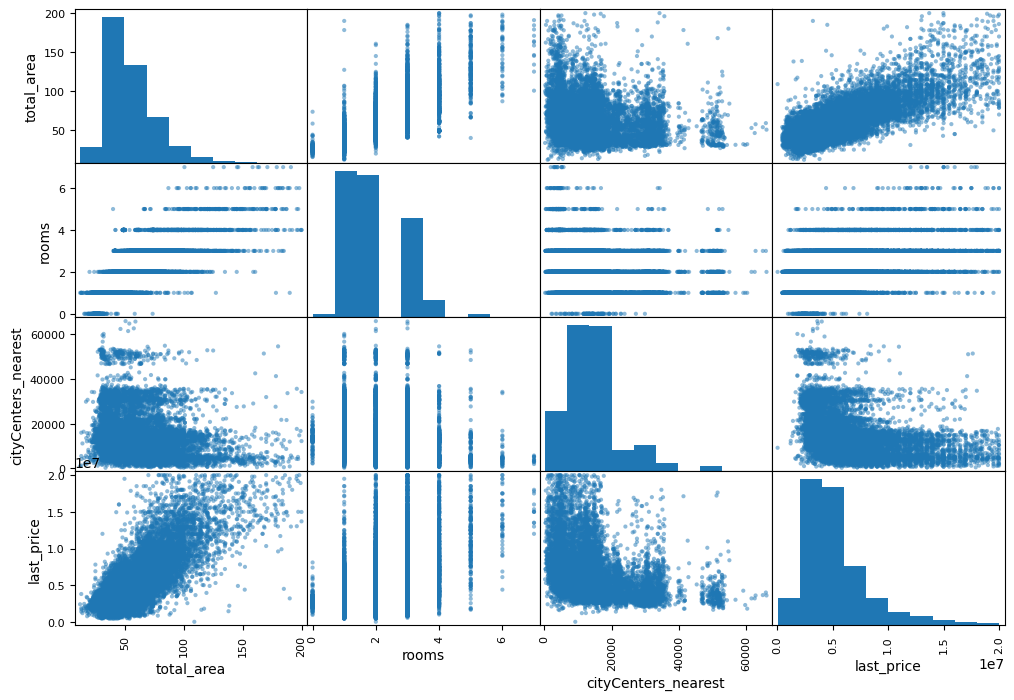

In [18]:
pd.plotting.scatter_matrix(data_filter[['total_area', 'rooms', 'cityCenters_nearest', 'last_price']], figsize=(12, 8))
plt.show()

In [19]:
print(data_filter[['total_area', 'rooms', 'cityCenters_nearest', 'last_price']].corr())

                     total_area     rooms  cityCenters_nearest  last_price
total_area             1.000000  0.796773            -0.190019    0.771933
rooms                  0.796773  1.000000            -0.134054    0.499961
cityCenters_nearest   -0.190019 -0.134054             1.000000   -0.347270
last_price             0.771933  0.499961            -0.347270    1.000000


Рассмотрим зависимость цены от дня недели, месяца и года, в который было выставлено объявление о продаже, а также проследим, меняется ли цена на крайних этажах 

In [20]:
pivot = data_filter.pivot_table(index='day_of_week', values='last_price', aggfunc='mean')
display(pivot)

,last_price
day_of_week,
Friday,5.304555e+06
Monday,5.336137e+06
Saturday,5.224316e+06
Sunday,5.197028e+06
Thursday,5.412806e+06
Tuesday,5.383474e+06
Wednesday,5.381148e+06


In [21]:
pivot = data_filter.pivot_table(index='month', values='last_price', aggfunc='mean')
display(pivot)

,last_price
month,
April,5.472528e+06
August,5.374497e+06
December,5.233132e+06
February,5.334374e+06
January,5.307644e+06
July,5.366219e+06
June,5.071948e+06
March,5.353903e+06
May,5.310974e+06


In [22]:
pivot = data_filter.pivot_table(index='year', values='last_price', aggfunc='mean')
display(pivot)

,last_price
year,
2014,1.108958e+07
2015,5.812802e+06
2016,5.321305e+06
2017,5.259003e+06
2018,5.261737e+06
2019,5.707754e+06


In [23]:
pivot = data_filter.pivot_table(index='floor_stat', values='last_price', aggfunc='mean')
display(pivot)

,last_price
floor_stat,
другой,5.571484e+06
первый,4.357574e+06
последний,4.984621e+06


Разница прослеживается: на первом и последнем этажах стоимость квартиры в среднем меньше. Также заметна зависимость стоимости от числа комнат и общей площади квартиры. Месяц публикации, а также день сильно на стоимость не влияют, но после 2014 года виден заметный спад средней цены, найдем причины этого

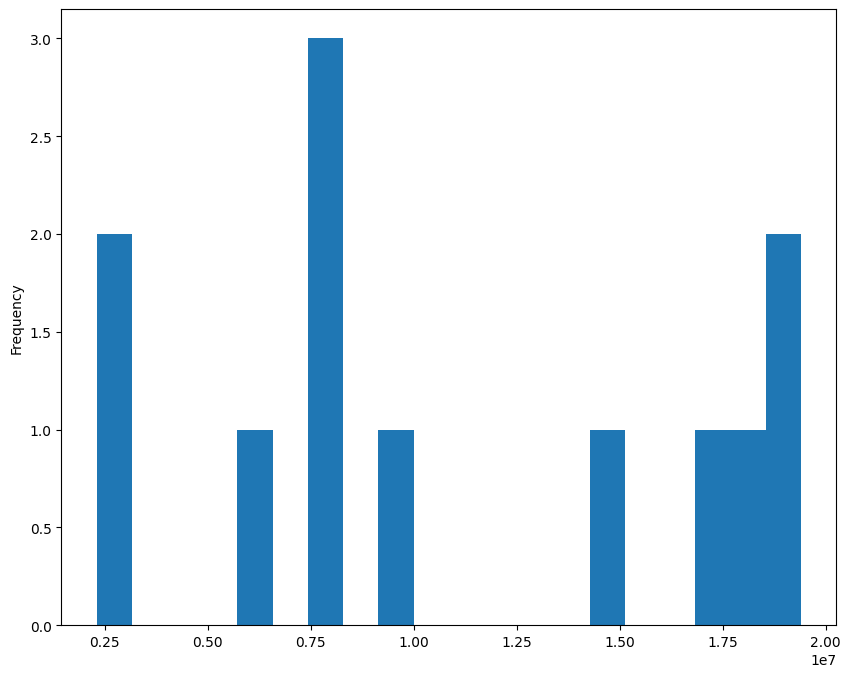

In [29]:
(
    data_filter.query("year == 2014")["last_price"]
    .plot(kind='hist', bins=20, figsize=(10, 8))
)
plt.show()

По графику видим, что за 2014 год слишком мало данных, отчего результаты получились искаженными. С учетом этого средняя стоимость за года сильно не меняется.

### Значения по городам

Найдем города, в которых продается больше всего квартир. Выделим города с наибольшей и наименьшей средней стоимостью за квадратный метр.

In [25]:
top_count = data_filter.groupby(by='locality_name')['last_price'].count().sort_values(ascending=False).head(10)
display(top_count)

top_count_sqr_mean = data_filter.query("locality_name in @top_count.index.tolist()").groupby(by='locality_name')['sq_price'].mean()
display('max price: ', top_count_sqr_mean.sort_values().head(1))
display('max price: ', top_count_sqr_mean.sort_values().tail(1))

locality_name
Санкт-Петербург      13841
посёлок Мурино         488
посёлок Шушары         417
Всеволожск             365
Пушкин                 332
Колпино                322
посёлок Парголово      311
Гатчина                282
деревня Кудрово        266
Выборг                 221
Name: last_price, dtype: int64

'max price: '

locality_name
Выборг    58098.368959
Name: sq_price, dtype: float64

'max price: '

locality_name
Санкт-Петербург    108671.433673
Name: sq_price, dtype: float64

Далее рассмотрим Санкт-Петербург и построим график зависимости стоимости квартиры от близости к центру. Из данного графика можно будет определить примерные границы _"центра"_ города

C:\Users\OneVay\AppData\Local\Temp\ipykernel_5736\2784723354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter['center_km'] = round(data_filter['cityCenters_nearest'] / 1000, 0)


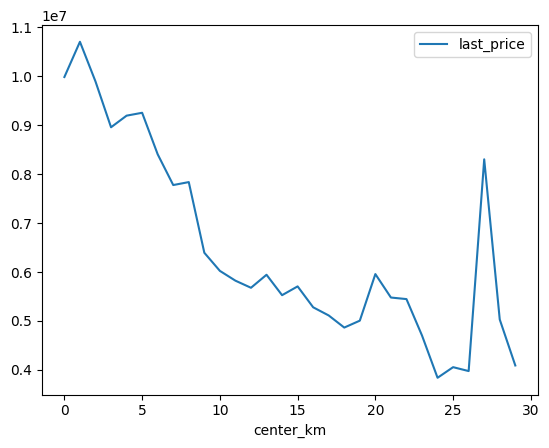

In [26]:
data_filter['center_km'] = round(data_filter['cityCenters_nearest'] / 1000, 0)

center_dist_price = data_filter.query("locality_name == 'Санкт-Петербург'").groupby(by='center_km')['last_price'].mean().reset_index()
center_dist_price.plot(x='center_km', y='last_price')
plt.show()

Далее сравним средние значения квартир в центре со всеми квартирами в отфильтрованном списке и найдем параметры, которые влияют на стоимость квартиры

In [27]:
data_center = data_filter.query("center_km <= 5")
print('total area mean: ', data_filter['total_area'].mean(), 'center mean: ', data_center['total_area'].mean())
print('total price mean: ', data_filter['last_price'].mean(), 'center mean: ', data_center['last_price'].mean())
print('total ceiling height mean: ', data_filter['ceiling_height'].mean(), 'center mean: ', data_center['ceiling_height'].mean())
print('total rooms mean: ', data_filter['rooms'].mean(), 'center mean: ', data_center['rooms'].mean())

total area mean:  55.84819418298193 center mean:  79.61716950082284
total price mean:  5341031.217432229 center mean:  9366241.575425124
total ceiling height mean:  2.7281795933734942 center mean:  2.987377948436643
total rooms mean:  1.9873870481927711 center mean:  2.7109160724081183


In [28]:
display(data_center[['last_price', 'total_area', 'floor', 'rooms', 'first_day_exposition', 'ceiling_height']].corr())

,last_price,total_area,floor,rooms,first_day_exposition,ceiling_height
last_price,1.000000,0.699063,0.160234,0.479785,0.016381,0.166217
total_area,0.699063,1.000000,0.036688,0.801903,-0.078230,0.193637
floor,0.160234,0.036688,1.000000,-0.066638,-0.044363,-0.139738
rooms,0.479785,0.801903,-0.066638,1.000000,-0.025871,0.142250
first_day_exposition,0.016381,-0.078230,-0.044363,-0.025871,1.000000,0.101464
ceiling_height,0.166217,0.193637,-0.139738,0.142250,0.101464,1.000000


## Общий вывод

На основе полученных данных можно сделать следующие выводы:
- Больше всего на стоимость квартиры влияет количество комнат и общая площадь
- На первом и последнем этажах стоимость квартир меньше, чем на остальных
- В среднем месяц, в который было выставлено объявление, не влияет на стоимость
- Обычно в центре Санкт-Петербурга общая площадь, средняя стоимость, высота потолков и число комнат больше, чем во всех квартирах отфильтрованный таблицы
- По графику можно определить зависимость стоимости квартиры от близости к центру